In [2]:
# set up the environment
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

Confirming that $e^{\pm j \phi} = \cos(\phi) \pm j\sin(\phi)$ falls in the unit circle of the complex plane:

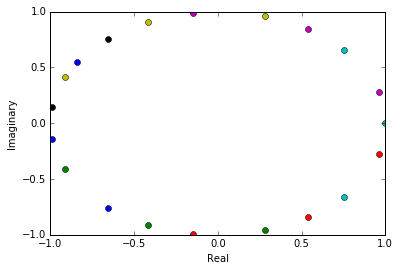

In [12]:
phis = range(-10,10) # change this value to use more points

for phi in phis:
    
    out = np.cos(phi) + 1j*np.sin(phi)
    
    plt.plot(np.real(out),np.imag(out),'o')

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()
